## Benchmarking 2D Convex Hull Algorithms


#### References

- https://github.com/tkoolen/PlanarConvexHulls.jl/blob/master/perf/runbenchmarks.jl

## Using Jarvis march

In [2]:
using Revise
using BenchmarkTools, PlanarConvexHulls, StaticArrays, Random

npoints = [1, 2, 3, 4, 5, 10, 20, 50, 100, 200, 500, 1000]

function jarvis_march(points)
    hull = ConvexHull{CCW, T}()
    jarvis_march!(hull, points)
    return hull
end

const T = Float64
p_jarvis = []
for n in npoints
    rng = MersenneTwister(n)
    hull = ConvexHull{CCW, T}()
    sizehint!(hull, n)
    points = [rand(rng, SVector{2, T}) for _ = 1 : n]
    push!(p_jarvis, @btime jarvis_march($points))
end

UndefVarError: UndefVarError: ConvexHull not defined

In [2]:
times_jarvis = [17.767e-9, 18.081e-9, 40.232e-9, 56.027e-9, 73.775e-9, 174.207e-9, 328.356e-9,
                1.682e-6, 3.982e-6, 8.250e-6, 19.543e-6, 41.412e-6];

#=
usando 
push!(p_jarvis, @btime jarvis_march($points))

  78.417 ns (3 allocations: 176 bytes)
  79.164 ns (3 allocations: 176 bytes)
  103.409 ns (3 allocations: 176 bytes)
  120.318 ns (3 allocations: 176 bytes)
  134.157 ns (3 allocations: 192 bytes)
  245.122 ns (3 allocations: 272 bytes)
  462.492 ns (3 allocations: 496 bytes)
  1.897 μs (3 allocations: 992 bytes)
  4.319 μs (3 allocations: 1.69 KiB)
  8.660 μs (3 allocations: 3.28 KiB)
  19.445 μs (3 allocations: 7.97 KiB)
  42.078 μs (3 allocations: 15.78 KiB)
=#

## Using Andrew's monotone chain

In [3]:
using LazySets

p_andrew = []

for n in npoints
    rng = MersenneTwister(n)
    points = [rand(rng, SVector{2, T}) for _ = 1 : n]
    push!(p_andrew, @btime convex_hull!($(copy(points))))
end

  9.150 ns (0 allocations: 0 bytes)
  51.692 ns (0 allocations: 0 bytes)
  17.357 ns (0 allocations: 0 bytes)
  17.056 ns (0 allocations: 0 bytes)
  25.128 ns (0 allocations: 0 bytes)
  445.652 ns (8 allocations: 640 bytes)
  414.769 ns (7 allocations: 496 bytes)
  711.924 ns (9 allocations: 784 bytes)
  896.244 ns (10 allocations: 1.09 KiB)
  951.571 ns (11 allocations: 1.42 KiB)
  904.643 ns (10 allocations: 1.09 KiB)
  1.078 μs (11 allocations: 1.42 KiB)


In [5]:
# LazySets v1.12.0
times_andrew = [6.224e-9, 46.164e-9, 327.271e-9, 418.784e-9, 396.647e-9, 683.952e-9,
                855.274e-9, 922.758e-9, 893.500e-9, 1.004e-6];

# LazySets v1.13.0
#=
  4.751 ns (0 allocations: 0 bytes)
  48.096 ns (0 allocations: 0 bytes)
  13.713 ns (0 allocations: 0 bytes)
  13.021 ns (0 allocations: 0 bytes)
  331.976 ns (7 allocations: 496 bytes)
  423.641 ns (8 allocations: 640 bytes)
  406.845 ns (7 allocations: 496 bytes)
  698.888 ns (9 allocations: 784 bytes)
  867.765 ns (10 allocations: 1.09 KiB)
  936.958 ns (11 allocations: 1.42 KiB)
  931.880 ns (10 allocations: 1.09 KiB)
  1.020 μs (11 allocations: 1.42 KiB)
=#

# LazySets v1.13.0
#=
  9.462 ns (0 allocations: 0 bytes)
  52.189 ns (0 allocations: 0 bytes)
  17.156 ns (0 allocations: 0 bytes)
  17.365 ns (0 allocations: 0 bytes)
  39.992 ns (1 allocation: 16 bytes)
  426.379 ns (8 allocations: 640 bytes)
  433.737 ns (7 allocations: 496 bytes)
  704.643 ns (9 allocations: 784 bytes)
  865.407 ns (10 allocations: 1.09 KiB)
  958.053 ns (11 allocations: 1.42 KiB)
  911.556 ns (10 allocations: 1.09 KiB)
  1.020 μs (11 allocations: 1.42 KiB)
=#

#=
LazySets v1.13.0, en master, usando convex_hull($points)

  41.622 ns (1 allocation: 96 bytes)
  94.421 ns (1 allocation: 112 bytes)
  52.259 ns (1 allocation: 128 bytes)
  395.609 ns (8 allocations: 640 bytes)
  420.528 ns (8 allocations: 656 bytes)
  659.885 ns (9 allocations: 880 bytes)
  1.249 μs (10 allocations: 1.20 KiB)
  3.008 μs (11 allocations: 2.08 KiB)
  6.159 μs (13 allocations: 4.06 KiB)
  13.189 μs (13 allocations: 6.27 KiB)
  44.797 μs (13 allocations: 13.36 KiB)
  110.886 μs (13 allocations: 25.05 KiB)
=#

#=
LazySets v1.13.0, en pr/1434, usando convex_hull($points)

  37.709 ns (1 allocation: 96 bytes)
  82.427 ns (1 allocation: 112 bytes)
  45.371 ns (1 allocation: 128 bytes)
  69.064 ns (2 allocations: 160 bytes)
  410.890 ns (8 allocations: 656 bytes)
  649.139 ns (9 allocations: 880 bytes)
  1.249 μs (10 allocations: 1.20 KiB)
  2.836 μs (11 allocations: 2.08 KiB)
  6.011 μs (13 allocations: 4.06 KiB)
  13.467 μs (13 allocations: 6.27 KiB)
  44.475 μs (13 allocations: 13.36 KiB)
  111.254 μs (13 allocations: 25.05 KiB)
=#

#=
  6.713 ns (0 allocations: 0 bytes)
  50.224 ns (0 allocations: 0 bytes)
  15.240 ns (0 allocations: 0 bytes)
  14.925 ns (0 allocations: 0 bytes)
  24.726 ns (0 allocations: 0 bytes)
  437.005 ns (8 allocations: 640 bytes)
  424.111 ns (7 allocations: 496 bytes)
  699.099 ns (9 allocations: 784 bytes)
  917.429 ns (10 allocations: 1.09 KiB)
  933.000 ns (11 allocations: 1.42 KiB)
  912.179 ns (10 allocations: 1.09 KiB)
  1.059 μs (11 allocations: 1.42 KiB)
=#

In [6]:
p_andrew[1]

1-element Array{SArray{Tuple{2},Float64,1,2},1}:
 [0.236033, 0.346517]

In [7]:
p_jarvis[1].vertices

1-element Array{SArray{Tuple{2},Float64,1,2},1}:
 [0.236033, 0.346517]

In [8]:
p_andrew[2]

2-element Array{SArray{Tuple{2},Float64,1,2},1}:
 [0.366796, 0.523879]
 [0.210256, 0.819338]

In [9]:
p_jarvis[2].vertices

2-element Array{SArray{Tuple{2},Float64,1,2},1}:
 [0.366796, 0.523879]
 [0.210256, 0.819338]

In [10]:
p_andrew[3]

3-element Array{SArray{Tuple{2},Float64,1,2},1}:
 [0.140061, 0.509444]
 [0.807622, 0.970091]
 [0.811698, 0.988432]

In [11]:
p_jarvis[3].vertices

3-element Array{SArray{Tuple{2},Float64,1,2},1}:
 [0.140061, 0.509444]
 [0.807622, 0.970091]
 [0.811698, 0.988432]

In [12]:
all([p_andrew[i] == p_jarvis[i].vertices for i in 1:10])

true

In [13]:
using Plots

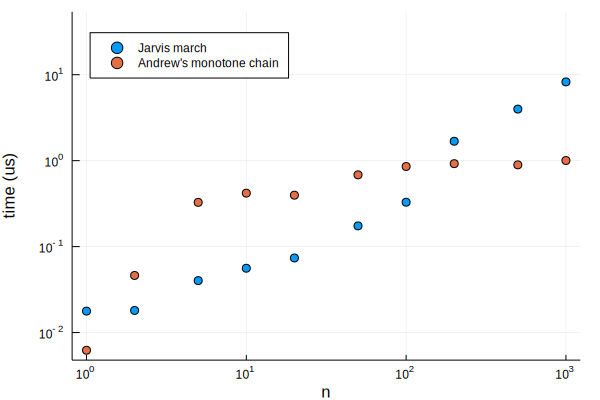

In [14]:
plot(npoints, times_jarvis .* 1e6, seriestype=:scatter, xaxis=:log, yaxis=:log, linestyle=:auto,
        legend=:topleft, label="Jarvis march")

plot!(npoints, times_andrew .* 1e6, seriestype=:scatter, xaxis=:log, yaxis=:log, line=:dot,
         xlab="n", ylab="time (us)",
         legend=:topleft, label="Andrew's monotone chain")

---

### Evaluation

In [15]:
n = 2
rng = MersenneTwister(n)
hull = ConvexHull{CCW, T}()
points = [rand(rng, SVector{2, T}) for _ = 1 : n]

2-element Array{SArray{Tuple{2},Float64,1,2},1}:
 [0.366796, 0.523879]
 [0.210256, 0.819338]

In [16]:
res = jarvis_march!(hull, points)

ConvexHull{CCW,Float64,SArray{Tuple{2},Float64,1,2},Array{SArray{Tuple{2},Float64,1,2},1}}(SArray{Tuple{2},Float64,1,2}[[0.366796, 0.523879], [0.210256, 0.819338]])

In [ ]:
res.vertices

In [ ]:
function _two_points_2d!(points)
    # special case, see #876
    p1, p2 = points[1], points[2]
    if p1 == p2  # check for redundancy
        pop!(points)
    elseif <=(p1, p2)
        nothing
    else
        points[1], points[2] = p2, p1
    end
    return points
end

using LazySets: _isapprox

function two_points_2d_approx!(points)
    p1, p2 = points[1], points[2]
    p1x, p1y = p1[1], p1[2]
    p2x, p2y = p2[1], p2[2]
    if _isapprox(p1x, p1y)
        if _isapprox(p2x, p2y)
            pop!(points)
            return points
        else
    else
        pop!(points)
    elseif <=(p1, p2)
        nothing
    else
        points[1], points[2] = p2, p1
    end
    return points
end

In [ ]:
# helper function for benchmarking
f(p1, p2) = p1 <= p2

In [ ]:
@btime f($points[1], $points[2])

In [ ]:
@btime le($points[1], $points[2])

In [ ]:
points = [[1.0, 1.0], [1.0+1e-10, 1.0+1e-10]]

#@btime two_points_2d!($points)

In [ ]:
points = [[1.0, 1.0], [1.0+1e-10, 1.0+1e-10]]

@btime two_points_2d_approx!($points)

In [ ]:
@btime two_points_2d!($points)

In [ ]:
?jarvis_march!

In [ ]:
?convex_hull

In [ ]:
p = rand(2)
points = [SVector{2}(p), SVector{2}(p)]

In [ ]:
hull = ConvexHull{CCW, T}()
points = [SVector{2}([1.0, 1.0]), SVector{2}([1.0, 1.0])]
res = jarvis_march!(hull, points)
res.vertices

In [ ]:
res.vertices

In [ ]:
using LazySets: quadrant, is_right_turn

function le(u::AbstractVector{N}, v::AbstractVector{N})::Bool where {N<:Real}
    qu, qv = quadrant(u), quadrant(v)
    if qu == qv
        # same quadrant, check right-turn with center 0
        return is_right_turn(u, v)
    end
    # different quadrant
    return qu < qv
end

In [ ]:
@btime le($p, $p)

In [ ]:
p = [rand(2), rand(2)]

In [ ]:
points = [SVector{2}([1.0, 1.000000000000001]), SVector{2}([1.0, 1.0])]
convex_hull!(points)

In [ ]:
1.000000000000001 == 1.0

In [ ]:
using LazySets: _isapprox

_isapprox(1.000000000000001, 1.0)

In [ ]:
u = [1.0, 1.0]
v = [-1.0, 1.0]

In [ ]:
u <= v

In [ ]:
a = [-1.0, -1.0]
b = [1.0, 1.0]
c = [-1.0, 1.0]

In [ ]:
plot(Singleton(a), color="blue")
plot!(Singleton(b), color="red")
plot!(Singleton(c), color="green")

In [ ]:
points = [a, b, c]
indmax = 1

for (i, pi) in enumerate(points)
    if pi[1] >= points[indmax][1]
        indmax = i
    end
end
indmax

In [ ]:
points_reordered = [points[2:end]; points[1:1]]

In [ ]:
plot(Singleton(points_reordered[1]), color="blue")
plot!(Singleton(points_reordered[2]), color="red")
plot!(Singleton(points_reordered[3]), color="green")

In [ ]:
u = [1.0, -1.0]
v = [1.0, 1.0]

In [ ]:
is_right_turn(u, v)

In [ ]:
u <= v

In [ ]:
7*45

In [ ]:
ans + 45

In [ ]:
eps(Float64)

In [ ]:
_isapprox(1.0, 1.0 + 1e-7)

In [ ]:
_isapprox(1.0, 1.0 + 1e-8)

In [36]:
using LazySets
using LazySets: isapproxzero

function _three_points_2d(points)
    _three_points_2d!(copy(points))
end
    
function _three_points_2d!(points)
    A, B, C = points[1], points[2], points[3]
    turn = (A[2] - B[2]) * C[1] + (B[1] - A[1]) * C[2] + (A[1] * B[2] - B[1] * A[2])

    if isapproxzero(turn)
        # ABC are collinear
        # ... Agarrar los de las puntas
        # ... Llamar a _two_points_2d! para descargar que sean redundantes
    elseif turn < 0
        # ABC is CW
        points[1], points[2], points[3] = C, B, A
    end   
    # else ABC is CCW => nothing to do
    return points
end

#=
# esta funcion tambien reordena
function _three_points_2d!(points)
    A, B, C = points[1], points[2], points[3]
    turn = (A[2] - B[2]) * C[1] + (B[1] - A[1]) * C[2] + (A[1] * B[2] - B[1] * A[2])

    if isapproxzero(turn)
        # ABC are collinear
        # agarrar los de las puntas
        # llamar a _two_points_2d! para descargar que sean redundantes
    elseif turn > 0
        # ABC is CCW
        A_leq_B = LazySets._leq_quadrant(A, B)
        if !A_leq_B
            # return BCA
            points[1], points[2], points[3] = B, C, A
            circshift!(points2, points, 2)
        else
            B_leq_C = LazySets._leq_quadrant(B, C)
            if B_leq_C
                # return ABC
                nothing
            else
                # return CAB
                points[1], points[2], points[3] = C, A, B
                circshift!(points2, points, 1)
            end
        end

    else
        # ABC is CW
        # . . .
    end
    return points
end
=#

_three_points_2d! (generic function with 1 method)

In [66]:
function elevar_cuadrado(x)
    x_squared = similar(x)
    for (i, xi) in enumerate(x)
        x_squared[i] = xi^2
    end
    return x_squared
end

function elevar_cuadrado!(x)
    for i in 1:length(x)
        x[i] = x[i]^2
    end
    return x
end

elevar_cuadrado! (generic function with 1 method)

In [67]:
x = rand(100);

In [70]:
@btime elevar_cuadrado($x);

  104.187 ns (1 allocation: 896 bytes)


In [69]:
@btime elevar_cuadrado!($x);

  71.830 ns (0 allocations: 0 bytes)


In [77]:
# caso en que estan alineados
A = [1.0, 1.0]
B = 2*a
C = 3*a
points = [a, b, c]

3-element Array{Array{Float64,1},1}:
 [1.0, 1.0]
 [2.0, 2.0]
 [3.0, 3.0]

In [85]:
x = [1, 2]

2-element Array{Int64,1}:
 1
 2

In [86]:
v = copy(x)

2-element Array{Int64,1}:
 1
 2

In [87]:
v[1] = 100

100

In [88]:
x

2-element Array{Int64,1}:
 1
 2

In [32]:
argmin([points[1][1], points[2][1], points[3][1]])

1

In [33]:
argmax([points[1][1], points[2][1], points[3][1]])

3

In [50]:
function f()
    a = [-1.0, -1.0]
    b = [1.0, 1.0]
    c = [-1.0, 1.0]
    points = [a, b, c]
    #_three_points_2d!(points)
end

f (generic function with 1 method)

In [51]:
@btime f()

  135.478 ns (4 allocations: 400 bytes)


3-element Array{Array{Float64,1},1}:
 [-1.0, -1.0]
 [1.0, 1.0]  
 [-1.0, 1.0] 

In [142]:
A = [-1.0, -1.0]
B = [1.0, 1.0]
C = [-1.0, 1.0]
points = [A, B, C];

In [143]:
pointer(points)

Ptr{Array{Float64,1}} @0x000000011a6fa740

In [124]:
# esto es out-of-place
points = [points[argmin([A[1], B[1], C[1]])], points[argmax([A[1], B[1], C[1]])]]

2-element Array{Array{Float64,1},1}:
 [-1.0, -1.0]
 [1.0, 1.0]  

In [136]:
pointer(points)

Ptr{Array{Float64,1}} @0x000000011daff460

In [144]:
points[1], points[2] = points[argmin([A[1], B[1], C[1]])], points[argmax([A[1], B[1], C[1]])]
pop!(points)

2-element Array{Float64,1}:
 -1.0
  1.0

In [146]:
pointer(points)

Ptr{Array{Float64,1}} @0x000000011a6fa740

In [141]:
argmax([5, -1, 7])

3

In [ ]:
@btime three_points_2d($points)

In [ ]:
@btime convex_hull($points)

In [ ]:
# asumo que estan en CCW

Ax <= Bx <= Cx # NO
Ax <= Cx <= Bx 

Bx <= Cx <= Cx
Bx <= Cx <= Bx

Cx <= Bx <= Cx
Cx <= Cx <= Bx

In [ ]:
@btime three_points_2d!($points)

In [ ]:
@btime three_points_2d!($points)

In [ ]:
# point are alligned
points = [a, 2*a, 3*a]

@btime three_points_2d!($points)